In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [21]:
df_train = pd.read_csv("D:\Big mart\\notebook\data\Train.csv")
df_test = pd.read_csv("D:\Big mart\\notebook\data\Test.csv")

In [22]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [23]:
df_train.drop(columns=["Item_Identifier","Outlet_Identifier"],inplace= True)

In [24]:
df_train.shape
df_test.shape

(5681, 11)

In [25]:
df_train.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [26]:
df_train.duplicated().sum()

0

In [33]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [32]:
df_train.duplicated().sum()

0

#### Handling missing values

In [31]:
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [11]:
numeric_col = df_train.select_dtypes(exclude='object').columns.to_list()
cat_col = df_train.select_dtypes(include='object').columns.to_list()
numeric_col
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [19]:
import numpy as np

unique_values = df_train["Item_Fat_Content"].unique()
unique_list = list(unique_values)
unique_list

['Low Fat', 'Regular', 'low fat', 'LF', 'reg']

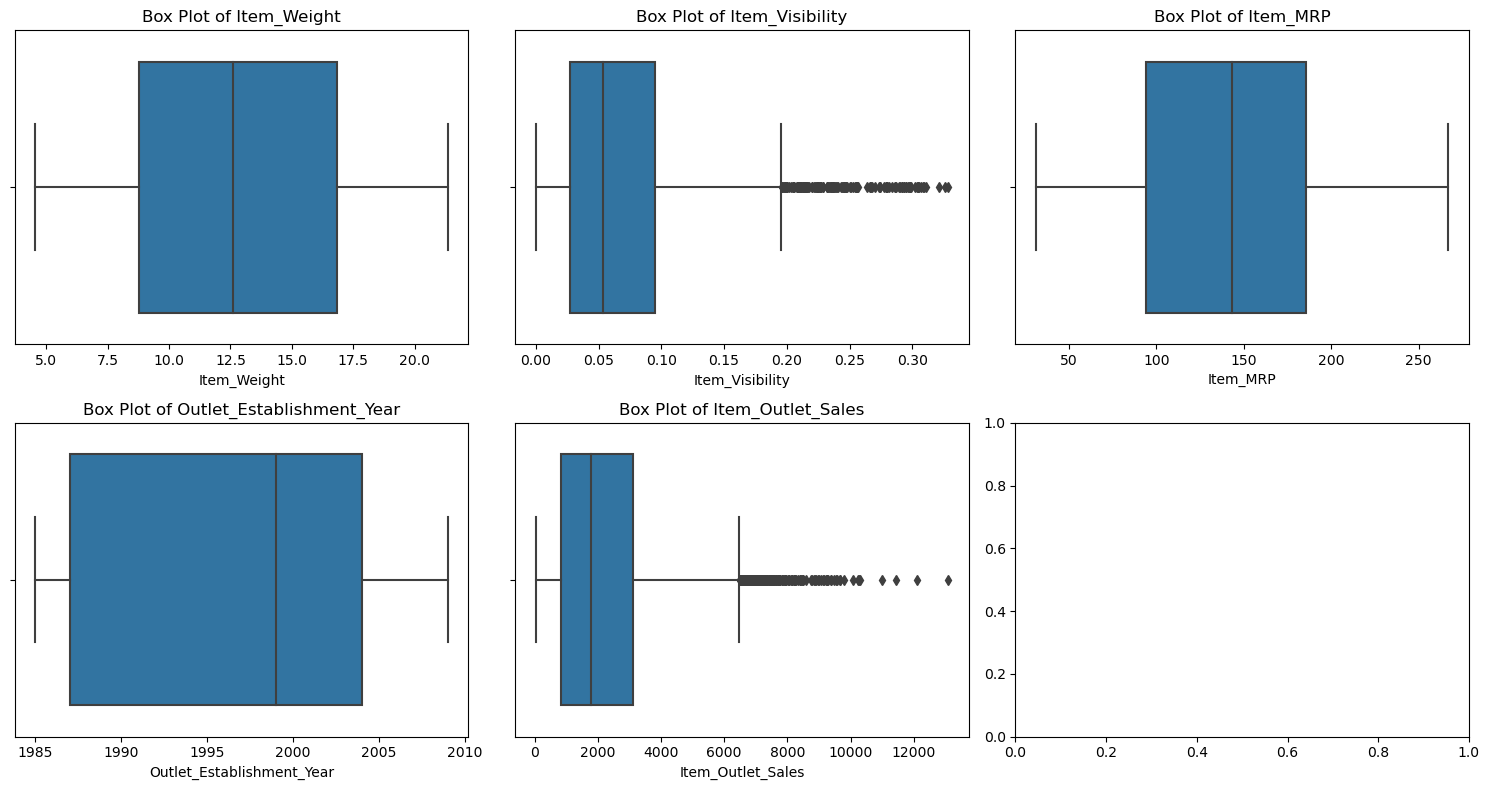

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
# Flattning is converting 2D arrays to 1D
axes = axes.flatten()

for i, col in enumerate(numeric_col):
    sns.boxplot(x=df_train[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')

# Adjust layout
plt.tight_layout()
plt.show()

In [12]:
#
df_train["Item_Weight"].fillna(df_train['Item_Weight'].mean(),inplace=True)
df_train["Outlet_Size"].fillna(df_train["Outlet_Size"].mode()[0],inplace=True)

In [13]:
df_test["Item_Weight"].fillna(df_train['Item_Weight'].mean(),inplace=True)
df_test["Outlet_Size"].fillna(df_train["Outlet_Size"].mode()[0],inplace=True)

### Feature Selection

In [14]:
df_train.drop(columns=["Item_Identifier","Outlet_Identifier"],inplace=True)
df_test.drop(columns=["Item_Identifier","Outlet_Identifier"],inplace=True)

In [15]:
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


### EDA with dtale library 

In [16]:
!pip install dtale

ERROR: Could not find a version that satisfies the requirement werkzeug<2.3; python_version >= "3.7" (from dtale) (from versions: none)
ERROR: No matching distribution found for werkzeug<2.3; python_version >= "3.7"


In [17]:
import dtale
dtale.show(df_train)

### Data cleaning using Klib library

In [18]:
# reduce memory size by lowercasing the column name
import klib
klib.data_cleaning(df_train)

Shape of cleaned data: (8523, 10) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.46 MB (-70.77%)



,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300000,Low Fat,0.016047,Dairy,249.809204,1999,Medium,Tier 1,Supermarket Type1,3735.137939
1,5.920000,Regular,0.019278,Soft Drinks,48.269199,2009,Medium,Tier 3,Supermarket Type2,443.422791
2,17.500000,Low Fat,0.016760,Meat,141.617996,1999,Medium,Tier 1,Supermarket Type1,2097.270020
3,19.200001,Regular,0.000000,Fruits and Vegetables,182.095001,1998,Medium,Tier 3,Grocery Store,732.380005
4,8.930000,Low Fat,0.000000,Household,53.861401,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,Low Fat,0.056783,Snack Foods,214.521805,1987,High,Tier 3,Supermarket Type1,2778.383301
8519,8.380000,Regular,0.046982,Baking Goods,108.156998,2002,Medium,Tier 2,Supermarket Type1,549.284973
8520,10.600000,Low Fat,0.035186,Health and Hygiene,85.122398,2004,Small,Tier 2,Supermarket Type1,1193.113647
8521,7.210000,Regular,0.145221,Snack Foods,103.133202,2009,Medium,Tier 3,Supermarket Type2,1845.597656


### Categorical features Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [20]:
cat_col=df_train.select_dtypes(include='object').columns.to_list()
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [21]:
for col in cat_col:
    df_train[col] = le.fit_transform(df_train[col])
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,1,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,2,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,1,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,2,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.930,1,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,2,0.046982,0,108.1570,2002,1,1,1,549.2850
8520,10.600,1,0.035186,8,85.1224,2004,2,1,1,1193.1136
8521,7.210,2,0.145221,13,103.1332,2009,1,2,2,1845.5976


### Dependant and Independant features

In [22]:
X = df_train.drop('Item_Outlet_Sales', axis = 1)
y = df_train['Item_Outlet_Sales']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y, random_state=101, test_size=0.2)


In [24]:
X_train.shape

(6818, 9)

In [25]:
X_test.shape

(1705, 9)

### Standardization of the data

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
X_test_std

array([[-0.43860915, -0.57382672, -0.21609255, ..., -0.28872895,
         1.08786619,  0.98524841],
       [ 1.22570189, -0.57382672, -0.52943461, ..., -1.95699503,
         1.08786619, -0.25964107],
       [-1.21845775,  0.97378032,  0.16277342, ...,  1.37953713,
        -1.36527477, -0.25964107],
       ...,
       [ 0.65508096, -0.57382672,  0.87824237, ..., -0.28872895,
         1.08786619, -1.50453056],
       [ 1.01171904, -0.57382672, -1.28409256, ..., -0.28872895,
         1.08786619,  0.98524841],
       [-1.56558548,  0.97378032, -1.09265374, ..., -0.28872895,
        -0.13870429, -0.25964107]])

### Model building

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_std,Y_train)

LinearRegression()

In [28]:
Y_pred_lr = lr.predict(X_test_std)

In [29]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(r2_score(Y_test,Y_pred_lr))
print(mean_absolute_error(Y_test,Y_pred_lr))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))

0.5041875762809338
880.9999067141264
1162.4412660891483


In [36]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()


In [39]:
rf.fit(X_train_std, Y_train)

RandomForestRegressor()

In [40]:
y_pred_rf = rf.predict(X_test_std)

In [41]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(r2_score(Y_test,y_pred_rf))
print(mean_absolute_error(Y_test,y_pred_rf))
print(np.sqrt(mean_squared_error(Y_test,y_pred_rf)))

0.5439698631896951
784.6631965478006
1114.8311329978865


### Hyper parameter tunning

In [45]:
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV 

# define models and parameters
model = RandomForestRegressor()
n_estimators = [10,100,1000]
max_depth = range(1,31)
min_samples_leaf = np.linspace(0.1,1.0)
max_features = ["auto", 'sqrt','log2']
min_samples_split = np.linspace(0.1,1.0,10)

# define grid search
grid = dict(n_estimators = n_estimators)

grid_search_forest = GridSearchCV(estimator=model,param_grid=grid,n_jobs=-1,
                                  scoring='r2',error_score = 0, verbose =2,cv=2)

grid_search_forest.fit(X_train_std,Y_train)

# Summerize result
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best: 0.550 using {'n_estimators': 1000}
0.515 (0.013) with: {'n_estimators': 10}
0.547 (0.005) with: {'n_estimators': 100}
0.550 (0.006) with: {'n_estimators': 1000}


2023-12-09 10:56:41,394 - INFO     - Executing shutdown due to inactivity...
2023-12-09 10:56:57,912 - INFO     - Executing shutdown...
2023-12-09 10:56:57,922 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer
